# Exercise 1
 <p><div class="lev1"><a href="#Task-A.-Another-LEGO-brick-in-the-wall"><span class="toc-item-num">Task A.&nbsp;&nbsp;</span>Another LEGO brick in the wall</a></div>
 <p><div class="lev1"><a href="#Task-B.-Drop-the-Bike"><span class="toc-item-num">Task B.&nbsp;&nbsp;</span>Drop the Bike</a></div>

In [1]:
# Add your imports here
import numpy as np
import pandas as pd

In [2]:
DATA_FOLDER = 'data'

## Task A. Another LEGO brick in the wall

LEGO is a popular brand of toy building bricks. They are often sold in sets in order to build a specific object. Each set contains a number of parts in different shapes, sizes and colors. This database contains information on which parts are included in different LEGO sets. It was originally compiled to help people who owned some LEGO sets already figure out what other sets they could build with the pieces they had.

This dataset contains the official LEGO colors, parts, inventories (i.e., sets of LEGO parts which assembled create an object in the LEGO world) and sets (i.e., sets of LEGO inventories which assembled create a LEGO ecosystem). The schema of the dataset can be shown in the following UML diagram: 

![lego-schema](lego-schema.png)

In this task you have to apply the following Data Wrangling pipeline:
1. Load your data into `Pandas`
* Explore it and clean its dirty parts
* Use it to answer a set of queries

Each of these subtasks are described in detail below.

### A1. Loading phase
Load all the csv files into different `DataFrames`. Use meaningful names for your `DataFrames` (e.g., the respective filenames).

*Hint: You can load files without first unzipping them (for `Pandas` version >= 0.18.1).*

In [3]:
LEGO_DATA_FOLDER = DATA_FOLDER + '/lego'

In [4]:
colors = pd.read_csv(LEGO_DATA_FOLDER + "/colors.csv.zip")
inventories = pd.read_csv(LEGO_DATA_FOLDER + "/inventories.csv.zip")
inventory_parts = pd.read_csv(LEGO_DATA_FOLDER + "/inventory_parts.csv.zip")
inventory_sets = pd.read_csv(LEGO_DATA_FOLDER + "/inventory_sets.csv.zip")
part_categories = pd.read_csv(LEGO_DATA_FOLDER + "/part_categories.csv.zip")
parts = pd.read_csv(LEGO_DATA_FOLDER + "/parts.csv.zip")
sets = pd.read_csv(LEGO_DATA_FOLDER + "/sets.csv.zip")
themes = pd.read_csv(LEGO_DATA_FOLDER + "/themes.csv.zip")
#themes = pd.read_csv(LEGO_DATA_FOLDER + "/themes.csv.zip", index_col = 0)

### A2. Cleaning phase
Explore the following columns from your dataset:

1. sets: year
* inventory_parts: quantity

What is the time range of the sets? 
What is the average quantity of the inventory parts? 
Do you see any inconsistencies? 
Provide code that detects and cleans such inconsistencies and validates the coherence of your dataset. 

### Inconsistencies

#### Sets Time Range
Several inconsistencies exist including:
1. 70s and 80s are considered big values while in reality, they mean 1970's and 1980's. The inconsistency in how the year was inputed results in 80s being considered the max value of the range, which is obviously false since the biggest value is 2017.
2. Negative values of year
3. Typos. For example: 19955 instead of 1995

#### Average Quantity of Inventory Parts
Quantity values of infinity are included in the data set, making it impossible to calculate the average. 


In [5]:
inventory_parts = inventory_parts.replace(-np.inf, np.nan)
inventory_parts.quantity.mean()

3.836938260983857

In [6]:
sets.loc[sets.year == '70s', 'year'] = 1970
sets.loc[sets.year == '80s', 'year'] = 1980
sets['year'] = sets['year'].astype(np.int64).abs()
sets['year'] = sets['year'].astype(str).str[:4]
min, max = sets.year.min(), sets.year.max()
min, max

('1950', '2017')

__\* Briefly explain your approach for every query here \*__

#### Inventory Parts: 
Replaced infinity values to NaN values. Since a value of infinity cannot be used to calculate average, these values will be excluded when using NaN.

#### Sets Time Range:

1. Converted 70s to 1970
2. Converted 80s to 1980
3. Converted the column 'year' to have a data type with integer value and replaced each value with its absolute value
4. Only kept the first four digits of each year (hence 19955 --> 1995)

### A3. Querying phase
Answer the following queries using the functionality of Pandas:

1. List the ids of the inventories that belong to sets that contain cars. (Hint: Find a smart way to distinguish which sets contain cars based on the sets' name).
2. Plot the distribution of part categories as a (horizontal) bar chart. Restrict yourself to the 20 largest part categories (in terms of the number of parts belonging to the category).
3. Find the dominant color of each set. Then, plot using a (horizontal) bar chart, the number of sets per dominant color. Color each bar with the respective color that it represents.
4. Create a scatter plot of the luminance* of the sets vs their publishing year. What do you observe for the years 1980-1981? How do you interpret what you see?

*The luminance of a color is a measure of brightness which, given its RGB representation, can be computed as follows:

$luminance = \sqrt{0.299*R^2 + 0.587*G^2 + 0.114*B^2}$

In [7]:
# Write your code here
#Q1 Solution
car_df = sets[sets['name'].str.contains(" (c|C)ar(s|$|\s)", regex=True)]
car_df.id

/Users/judygong/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


27           10002-1
50           10022-1
53           10025-1
142          10158-1
154          10170-1
182          10200-1
295          10552-1
325          10589-1
335          10600-1
376          10673-1
446          1076-22
505           1109-1
600          11908-1
705           1247-1
715           1253-1
717           1255-1
852           1361-1
858            137-2
918           1467-1
922            147-1
926           1477-1
933           1489-1
939           1496-1
957           1517-1
958           1518-1
1004           157-3
1038          1610-1
1043          1612-1
1097           167-1
1207          1825-1
            ...     
7623          7119-1
7800          7236-2
7807          7241-1
7898         7324-20
7945          7424-2
8011         75023-6
8227         7553-16
8228         7553-17
8229         7553-18
8316         75821-1
8485          7611-1
8486          7612-1
8565         7687-20
8566         7687-21
8807          7902-1
8842         7907-15
9279         

In [8]:
#Q2 Solution
parts_merge = pd.merge(parts, part_categories, how='outer', left_on=['part_cat_id'], right_on=['id'])
parts_grouped = parts_merge.groupby(['part_cat_id']).size().nlargest(20)
#parts_grouped = parts_grouped.sort_values(by='counts', ascending=False)[0:20]
parts_grouped.plot(x='part_cat_id', kind='bar', title='Distribution of Category Parts')

###### __\* Briefly explain your approach for every query here \*__

rgb
0033B2    29
05131D    73
237841     4
4C61DB    41
6C6E68     2
A0A5A9     3
AA7F2E     3
B48455     6
C91A09     2
DBAC34     1
FFFFFF     5
dtype: int64

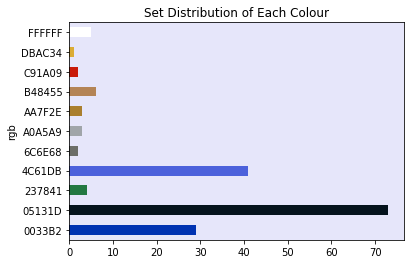

In [56]:
#Q3 Solution
result = pd.merge(inventory_parts, inventory_sets, how='outer', on='inventory_id')
result1 = result.groupby(['set_id', 'color_id'], sort=True).size().reset_index(name='count')
#result2 = result1.groupby(['set_id']).apply(lambda x: x.loc[x['count'] == x['count'].max()])
result2 = result1.iloc[result1.groupby(['set_id']).apply(lambda x: x['count'].idxmax())]
result3 = pd.merge(result2, colors, how='inner', left_on=['color_id'], right_on=['id'])
result4 = result3.groupby(['rgb']).size()
color_list = result4.index.tolist()
color_rgb = ['#' + color for color in color_list]
graph = result4.plot(x='rgb', kind='barh', color=color_rgb, title='Set Distribution of Each Colour')
graph.set_facecolor('#e6e6fa')
#result1.groupby(['set_id']).apply(lambda x: print(type(x['count'])))
result4

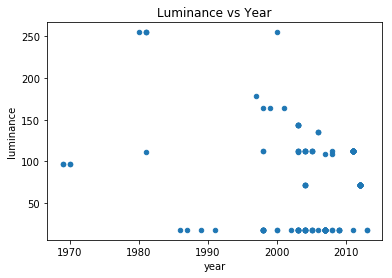

In [202]:
hex_to_rgb = lambda x: int(x,16)
result3['R'] = (result3['rgb'].astype(str).str[0:2]).apply(hex_to_rgb)
result3['G'] = (result3['rgb'].astype(str).str[2:4]).apply(hex_to_rgb)
result3['B'] = (result3['rgb'].astype(str).str[4:6]).apply(hex_to_rgb)
result3['luminance'] = np.sqrt(0.299 * result3['R']**2 + 0.587 * result3['G']**2 + 0.114 * result3['B']**2)
sets_year = pd.merge(result3, sets, how='inner', left_on=['set_id'], right_on=['id'])
sets_year['year'] = pd.to_numeric(sets_year['year'])
sets_year.plot(x='year', y='luminance', kind='scatter', title='Luminance vs Year')

In [11]:
sets_year.loc[sets_year['year'] == 1980]

,set_id,color_id,count,id_x,name_x,rgb,is_trans,R,G,B,luminance,id_y,name_y,year,theme_id,num_parts
73,1062-1,15.0,8,15,White,FFFFFF,f,255,255,255,255.0,1062-1,{Town Vehicles},1980,533,158


## Task B. Drop the bike

*Los Angeles Metro* has been sharing publicly [anonymized *Metro Bike Share* trip data](https://bikeshare.metro.net/about/data/) under the [Open Database License (ODbL)](http://opendatacommons.org/licenses/odbl/1.0/).

In this task you will again perform data wrangling and interpretation.

### B1. Loading phase
Load the json file into a `DataFrame`.


In [63]:
BIKES_DATA_FOLDER = DATA_FOLDER + '/bikes'

In [64]:
# Write your code here
bikes = pd.read_json(BIKES_DATA_FOLDER + "/metro-bike-share-trip-data.json.zip")
bikes

,Bike ID,Duration,End Time,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Passholder Type,Plan Duration,Start Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID,Trip Route Category
0,6281.0,180,2016-07-07T04:20:00,3014.0,34.056610,-118.237210,Monthly Pass,30.0,2016-07-07T04:17:00,3014.0,34.056610,-118.237210,1912818,Round Trip
1,6281.0,1980,2016-07-07T06:33:00,3014.0,34.056610,-118.237210,Monthly Pass,30.0,2016-07-07T06:00:00,3014.0,34.056610,-118.237210,1919661,Round Trip
2,5861.0,300,2016-07-07T10:37:00,3016.0,34.052898,-118.241560,Flex Pass,365.0,2016-07-07T10:32:00,3016.0,34.052898,-118.241560,1933383,Round Trip
3,5861.0,10860,2016-07-07T13:38:00,3016.0,34.052898,-118.241560,Flex Pass,365.0,2016-07-07T10:37:00,3016.0,34.052898,-118.241560,1944197,Round Trip
4,6674.0,420,2016-07-07T12:58:00,3032.0,34.049889,-118.255880,Walk-up,0.0,2016-07-07T12:51:00,3032.0,34.049889,-118.255880,1940317,Round Trip
5,6717.0,780,2016-07-07T13:04:00,3054.0,34.039219,-118.236490,Monthly Pass,30.0,2016-07-07T12:51:00,3021.0,34.045609,-118.237030,1944075,One Way
6,5721.0,600,2016-07-07T13:04:00,3014.0,34.056610,-118.237210,Monthly Pass,30.0,2016-07-07T12:54:00,3022.0,34.046070,-118.233090,1944073,One Way
7,5957.0,600,2016-07-07T13:09:00,3005.0,34.048550,-118.259050,Flex Pass,365.0,2016-07-07T12:59:00,3076.0,34.040600,-118.253840,1944067,One Way
8,6137.0,2880,2016-07-07T13:49:00,3031.0,34.044701,-118.252440,Flex Pass,365.0,2016-07-07T13:01:00,3031.0,34.044701,-118.252440,1944062,Round Trip
9,6351.0,960,2016-07-07T13:17:00,3078.0,34.064281,-118.238940,Monthly Pass,30.0,2016-07-07T13:01:00,3031.0,34.044701,-118.252440,1944063,One Way


### B2. Cleaning phase
Describe the type and the value range of each attribute. Indicate and transform the attributes that are `Categorical`. Are there redundant columns in the dataset (i.e., are there columns whose value depends only on the value of another column)? What are the possible pitfalls of having such columns? Reduce *data redundancy* by extracting such columns to separate `DataFrames`. Which of the two formats (the initial one or the one with reduced data redundancy) is more susceptible to inconsistencies? At the end print for each `Dataframe` the *type of each column* and it's *shape*.

#### Attribute Types

In [65]:
bikes.dtypes

Bike ID                       float64
Duration                        int64
End Time                       object
Ending Station ID             float64
Ending Station Latitude       float64
Ending Station Longitude      float64
Passholder Type                object
Plan Duration                 float64
Start Time                     object
Starting Station ID           float64
Starting Station Latitude     float64
Starting Station Longitude    float64
Trip ID                         int64
Trip Route Category            object
dtype: object

See above output for attribute types. In addition to above description: Passholder Type and Trip Route Category are categorical variables. Start Time and End Time are date and time attributes.

#### Attribute Value Range

In [66]:
bikes.describe()

,Bike ID,Duration,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Plan Duration,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID
count,132417.000000,132427.000000,132331.00000,131376.000000,131376.000000,131661.000000,132408.000000,132379.000000,132379.000000,1.324270e+05
mean,6193.618878,1555.301562,3042.38672,34.034614,-118.206642,44.821967,3043.020754,34.039309,-118.221534,1.153001e+07
std,293.606755,5814.241813,43.08440,0.650706,2.259913,90.411579,37.742021,0.529336,1.838335,6.369462e+06
min,1349.000000,60.000000,3000.00000,0.000000,-118.472832,0.000000,3000.000000,0.000000,-118.472832,1.912818e+06
25%,5953.000000,360.000000,3022.00000,34.044159,-118.256981,0.000000,3024.000000,34.044170,-118.256980,5.060814e+06
50%,6186.000000,600.000000,3038.00000,34.046810,-118.250954,30.000000,3040.000000,34.046822,-118.250954,1.043827e+07
75%,6434.000000,1080.000000,3063.00000,34.050480,-118.238810,30.000000,3063.000000,34.050880,-118.241562,1.720633e+07
max,6728.000000,86400.000000,4108.00000,34.064281,0.000000,365.000000,4108.000000,34.064281,0.000000,2.379422e+07


#### Categorical and Redundant Attributes

In [67]:
bikes['Passholder Type'] = bikes['Passholder Type'].astype('category')
bikes['Trip Route Category'] = bikes['Trip Route Category'].astype('category')

The attributes that are categorical include:
1. Passholder Type 
2. Trip Route Category

Redundant columns include:
1. Ending/Starting Station Latitude/Longitude (these 4 attributes all depend on their respective station ID)
2. Plan Duration (plan duration depends only on passholder type)
3. Duration (if you know start time and end time, you can calculate duration)
4. Trip Route Category (if starting station ID = ending station ID, then it is a round trip, otherwise it is one way)

Possible pitfalls of redundant attributes:
1. Unnecessary increase of dataframe size
2. Decrease in efficiency when doing computation on the dataframe due to size increase
3. May cause data inconsistency --> for example, if you update one column but forget to update the related or dependant column


In [68]:
# Write your code here

#New table with Station IDs and their longitude/latitude
df1 = bikes.iloc[: ,3:6]
df2 = bikes.iloc[: ,9:12]
df1.columns = ['Station ID', 'Station Latitude', 'Station Longitude']
df2.columns = ['Station ID', 'Station Latitude', 'Station Longitude']
station_coordinates = df1.append(df2).drop_duplicates()

#New table with Passholder type and plan durations
pass_holders = bikes.iloc[:, 6:8].drop_duplicates()
pass_holders.drop([98675]) #drop row where monthly pass has NaN plan duration

#Clean up original df
del bikes['Ending Station Latitude']
del bikes['Ending Station Longitude']
del bikes['Starting Station Latitude']
del bikes['Starting Station Longitude']
del bikes['Plan Duration']

#Note: Did not feel the need to create new tables with Duration and Trip Route Category attributes because they can be calculated

The original dataframe was more susceptible for data inconsistency. This is because by creating another dataframe, it is easier to update redundant or dependant columns via the new dataframe, rather than update the entire original dataframe. For example, if you wanted to update the latitude/longitude of a particular station, you just need to change one row in the station_coordinates dataframe. If this table didn't exist, you would have to search both ending and starting station IDs in the original table and change every row that contains the particular station. These added steps result in higher chance of data inconsistency (for example, if you miss a specific row, or only search the ending station IDs column, you will end up with station IDs with different coordinates).

In [69]:
print("Bikes Dataframe")
print(bikes.shape)
print(bikes.dtypes)

print("\nStation_Coordinates Dataframe")
print(station_coordinates.shape)
print(station_coordinates.dtypes)

print("\nPassHolders Dataframe")
print(pass_holders.shape)
print(pass_holders.dtypes)

Bikes Dataframe
(132427, 9)
Bike ID                 float64
Duration                  int64
End Time                 object
Ending Station ID       float64
Passholder Type        category
Start Time               object
Starting Station ID     float64
Trip ID                   int64
Trip Route Category    category
dtype: object

Station_Coordinates Dataframe
(129, 3)
Station ID           float64
Station Latitude     float64
Station Longitude    float64
dtype: object

PassHolders Dataframe
(5, 2)
Passholder Type    category
Plan Duration       float64
dtype: object


__\* Briefly explain your approach here \*__

Created two new dataframes:
1. station_coordinates contains unique values of all station_id, station_latitude, and station_longitude used in the original dataframe from both ending and starting stations.
2. pass_holders contain unique passholder types and their respective plan durations.

### B3. Querying phase
Answer the following queries using the functionality of `Pandas`.

1. Plot the *distribution* of the number of outgoing trips from each station in a histogram with 20 bins (Hint: each bin describes a range of counts, not stations).
* Plot histograms for the *duration* and *trip starting hour in the day* attributes. For both the *duration*  and the *trip starting hour* use *discrete 1-hour intervals*. What do you observe in each plot? What are some popular values in the *duration* plot? Explain the local maxima and the trends you observe on the *trip starting hour* plot based on human behavior.
* For each *trip route category*, calculate the proportion of trips by *passholder type* and present your results in *a stacked bar chart with normalized height*.
* Considering only trips that begin in the morning hours (before noon), plot in *a single bar chart* the proportion of trips by *passholder type* and *trip route category*. Explain any outliers you observe.
* Separate the hours of the day into two intervals that have (approximately) the same number of bikes leaving the stations. For each of the two intervals calculate the proportion of trips by *passholder type* and *trip route category*. Present your results in a `DataFrame` which has a unique, non-composite index. Does the proportion of trips depend on whether it is the first or second hour interval? Would the company have any significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one? Assume that the number of trips per interval will not change if the scheme changes.

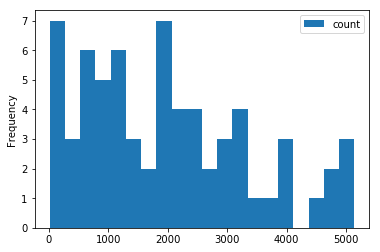

In [144]:
# Write your code here
#Q1
import matplotlib.pyplot as plt
#bikes['Starting Station ID'].plot(kind = 'hist', bins=20)
starting_station_count = bikes.groupby(['Starting Station ID']).size().reset_index(name='count')
starting_station_count.plot(x='Starting Station ID', kind='hist', bins=20)
#bikes[bikes["Starting Station ID"] > 4000]

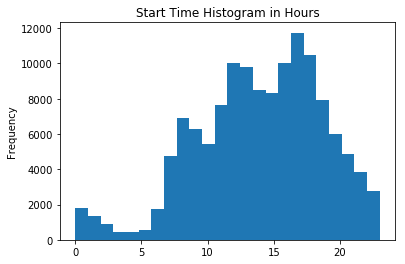

In [147]:
bikes['Start Time'] = pd.to_datetime(bikes['Start Time'])
bikes['End Time'] = pd.to_datetime(bikes['End Time'])
bikes['Duration in hours'] = bikes['Duration'] / 3600
bikes['Start Time in hours'] = bikes['Start Time'].apply(lambda x: x.hour)
bikes['Start Time in hours'].plot(kind="hist", bins=24, title="Start Time Histogram in Hours")
#bikes

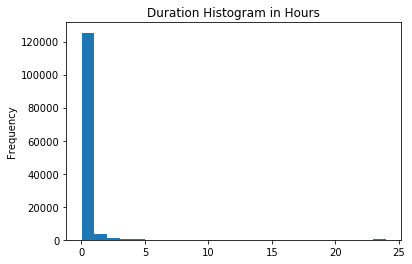

In [151]:
#bikes['Duration in hours'].plot(kind="hist", bins=24, title="Duration Histogram in Hours", range=(0, 1440))
bikes['Duration in hours'].plot(kind="hist", bins=24, title="Duration Histogram in Hours")

A popular duration is less than 1 hour--this indicates that most bike trips are extremely short and under 1 hour. A local maximum for start time is around 17:00PM which is often when most people get off work. This is considered rush hour and hence bike start time spikes at this time, indicating it may be possible that many people are biking back home from work. 

__\* Briefly explain your approach for every query here \*__

Passholder Type,Flex Pass,Monthly Pass,Staff Annual,Walk-up
Trip Route Category,,,,
One Way,0.075509,0.648033,0.002499,0.273959
Round Trip,0.037779,0.295033,0.006492,0.660696


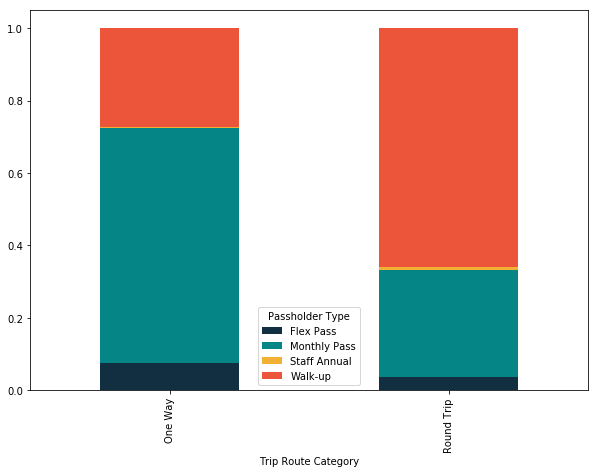

In [199]:
temp = bikes.groupby(['Trip Route Category', 'Passholder Type']).size()
temp2 = temp.groupby(['Trip Route Category']).apply(lambda x: x / x.sum()).reset_index(name='proportion')
#namesgrouped.groupby(level=[0, 1]).apply(lambda x: x / x.sum())
pivot_df = temp2.pivot(index='Trip Route Category', columns='Passholder Type', values='proportion')

colors = ["#112F41", "#068587","#F2B134","#ED553B"]
pivot_df.loc[:,['Flex Pass','Monthly Pass', 'Staff Annual', 'Walk-up']].plot.bar(stacked=True, color=colors, figsize=(10,7))
#temp2.plot(x = 'Trip Route Category, Passholder Type', kind='bar', stacked=True)
pivot_df

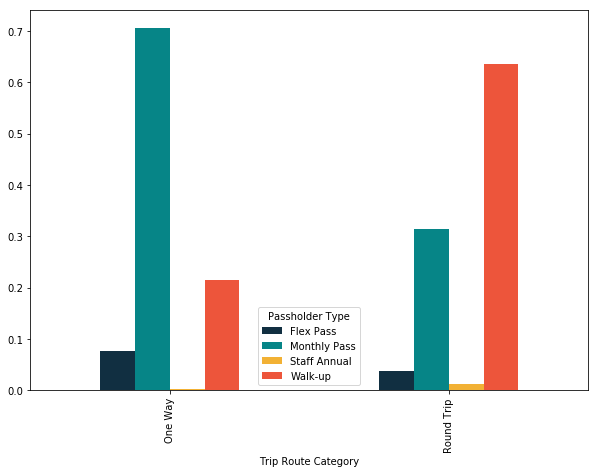

In [178]:
bikes_filter = bikes[bikes["Start Time in hours"] < 12]
temp = bikes_filter.groupby(['Trip Route Category', 'Passholder Type']).size()
temp2 = temp.groupby(['Trip Route Category']).apply(lambda x: x / x.sum()).reset_index(name='proportion')
#temp2
#temp2.plot(kind='bar')
pivot_df = temp2.pivot(index='Trip Route Category', columns='Passholder Type', values='proportion')
pivot_df.loc[:,['Flex Pass','Monthly Pass', 'Staff Annual', 'Walk-up']].plot.bar(stacked=False, color=colors, figsize=(10,7))

Staff Annual has lowest proportion in both one-way and round-trip, which makes sense because there is likely few staff relative to customers. Walk-up is highest for round trip; this may be because of tourists who want to rent a bike to travel around the city and return to the original starting destination. 

In [204]:
bikes_interval1 = bikes[bikes["Start Time in hours"] < 15]
bikes_interval2 = bikes[bikes["Start Time in hours"] >= 15]
temp1 = bikes_interval1.groupby(['Trip Route Category', 'Passholder Type']).size()
proportion1 = temp1.groupby(['Trip Route Category']).apply(lambda x: x / x.sum()).reset_index(name='proportion')
temp2 = bikes_interval2.groupby(['Trip Route Category', 'Passholder Type']).size()
proportion2 = temp2.groupby(['Trip Route Category']).apply(lambda x: x / x.sum()).reset_index(name='proportion')
proportion1['Interval'] = "Before 15:00"
proportion2['Interval'] = "At or After 15:00"
proportion_intervals = pd.concat([proportion1, proportion2])
proportion_intervals.reset_index(drop=True)
proportion_intervals.groupby(['Trip Route Category', 'Passholder Type', 'Interval']).sum()

proportion
Trip Route Category Passholder Type Interval                     
One Way             Flex Pass       At or After 15:00    0.073897
                                    Before 15:00         0.077116
                    Monthly Pass    At or After 15:00    0.638882
                                    Before 15:00         0.657161
                    Staff Annual    At or After 15:00    0.001942
                                    Before 15:00         0.003055
                    Walk-up         At or After 15:00    0.285279
                                    Before 15:00         0.262668
Round Trip          Flex Pass       At or After 15:00    0.034649
                                    Before 15:00         0.040729
                    Monthly Pass    At or After 15:00    0.274778
                                    Before 15:00         0.314134
                    Staff Annual    At or After 15:00    0.003868
                                    Before 15:00         0.008967
                    Walk-up         At or After 15:00    0.686704
                                    Before 15:00         0.636170